In [54]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load).dropna()

ride_data_df = pd.read_csv(ride_data_to_load).dropna()
# Combine the data into a single dataset
pyber_df = pd.merge( ride_data_df, city_data_df, on= "city")
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

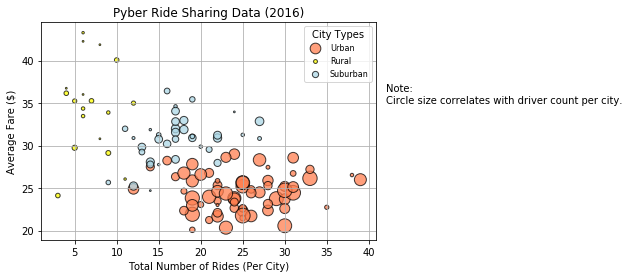

In [64]:

urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

# Urban 
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

# Rural 
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

# Suburban 
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, s_urban*3, label = "Urban", color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, s_rural*3, label = "Rural", color=["yellow"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban,s_suburban*3, label = "Suburban", color=["lightblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()


## Total Fares by City Type

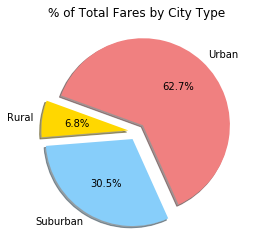

In [93]:

# Calculate Type Percents
totalfares = pyber_df.groupby(['type'])
fare_sum = totalfares['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("TotalFaresbyCityType.png")

# Show Figure
plt.show()

## Total Rides by City Type

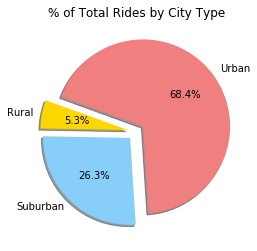

In [92]:
# Calculate Type Percents
rides_count = totalfares['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("TotalRidesbyCityType.png")

# Show Figure
plt.show()

## Total Drivers by City Type

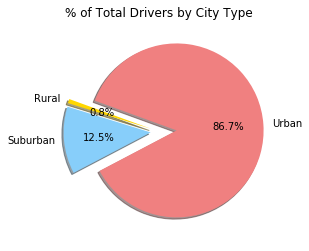

In [91]:
# Calculate Type Percents
type_groupped_drivers = pyber_df.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0.1, 0.1, 0.2)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=160)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("TotalDriversbyCityType.png")

# Show Figure
plt.show()
